In [1]:
print("Hola mundo")


Hola mundo


In [2]:
import kagglehub
import os
import shutil

path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
destino = "data/raw"

#Primero crear el directorio a donde se moverán los archivos
if not os.path.exists(destino):
    os.makedirs(destino)

#Mover los archivos a "data/raw" se mueven en formato .csv
for archivo in os.listdir(path):
    print('archivo', archivo)
    shutil.move(os.path.join(path, archivo), os.path.join(destino, archivo))
    



/home/pablo/Workspace/DataScience/practices/DataAnalysisPractices/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 42.6M/42.6M [00:06<00:00, 6.50MB/s]

Extracting files...


archivo olist_geolocation_dataset.csv
archivo olist_order_payments_dataset.csv
archivo olist_orders_dataset.csv
archivo olist_sellers_dataset.csv
archivo olist_products_dataset.csv
archivo olist_customers_dataset.csv
archivo olist_order_items_dataset.csv
archivo olist_order_reviews_dataset.csv
archivo product_category_name_translation.csv


In [3]:
import pandas as pd
from sqlalchemy import create_engine
import os 

#Crear una conexión con la base de datos descargada en Kaggle para olist sells
engine = create_engine('sqlite:///data/olist.db')

#Listar los archivos descargados en data/raw 
ruta_csv = 'data/raw'
archivos = [f for f in os.listdir(ruta_csv) if f.endswith('csv')]

#Cargar cada csv como una table en la base de datos olist.db como una tabla de SQL
for archivo in archivos:
    nombre_tabla = archivo.replace('.csv', '').replace('_dataset', '')
    df = pd.read_csv(os.path.join(ruta_csv, archivo))
    df.to_sql(nombre_tabla, engine, if_exists='replace', index=False)
    print(f"Tabla '{nombre_tabla}' creada con éxito.")


Tabla 'olist_geolocation' creada con éxito.
Tabla 'olist_order_payments' creada con éxito.
Tabla 'olist_orders' creada con éxito.
Tabla 'olist_sellers' creada con éxito.
Tabla 'olist_products' creada con éxito.
Tabla 'olist_customers' creada con éxito.
Tabla 'olist_order_items' creada con éxito.
Tabla 'olist_order_reviews' creada con éxito.
Tabla 'product_category_name_translation' creada con éxito.


In [4]:
import pandas as pd
df_recuperado = pd.read_sql('olist_orders', con=engine)
print(df_recuperado.head(10))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2   

In [5]:
df_recuperado.to_csv('data/animatrix.csv, index=False')
print(f"El tipo de la variable df_recuperado es {type(df_recuperado)}")

El tipo de la variable df_recuperado es <class 'pandas.core.frame.DataFrame'>


In [15]:
for col in df_recuperado.columns:
    print(f"{col}")

order_id
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date


In [13]:
# Checar los posibles valores de order_status
print(df_recuperado['order_status'].value_counts())

delivered_df = df_recuperado[df_recuperado['order_status'] == 'delivered']
df = (df_recuperado['order_status'] == 'delivered')
print(df.sum())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
96478


### Haremos un simple ejericio en el que descubriremos que meses son en los que se realizan más cancelaciones. Eso con la idea de poder evitarlas por medio de promociones u otras mercadotécnias

In [22]:
print('Antes de hacer datetime', df_recuperado['order_purchase_timestamp'])
df_recuperado['order_purchase_timestamp'] = pd.to_datetime(df_recuperado['order_purchase_timestamp'])
print('Después de hacer datetime', df_recuperado['order_purchase_timestamp'])

df_recuperado['año_mes']=df_recuperado['order_purchase_timestamp'].dt.to_period('M')
print(df_recuperado['año_mes'].value_counts())

Antes de hacer datetime 0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]
Después de hacer datetime 0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]
año_mes
2017-11    7544
2018-01    7269
2018-03    7211
2018-04    6939
2018-05    6873
2018-02    6728
2018-08    6512
2018-07    6292
2018-06    6167
2017-12    5673
2017-10    4631
2017-08    4

In [27]:
cancelados = df_recuperado[df_recuperado['order_status'] == 'canceled']

cancelaciones_por_mes = cancelados.groupby('año_mes').size()
print(cancelaciones_por_mes)

año_mes
2016-09     2
2016-10    24
2017-01     3
2017-02    17
2017-03    33
2017-04    18
2017-05    29
2017-06    16
2017-07    28
2017-08    27
2017-09    20
2017-10    26
2017-11    37
2017-12    11
2018-01    34
2018-02    73
2018-03    26
2018-04    15
2018-05    24
2018-06    18
2018-07    41
2018-08    84
2018-09    15
2018-10     4
Freq: M, dtype: int64


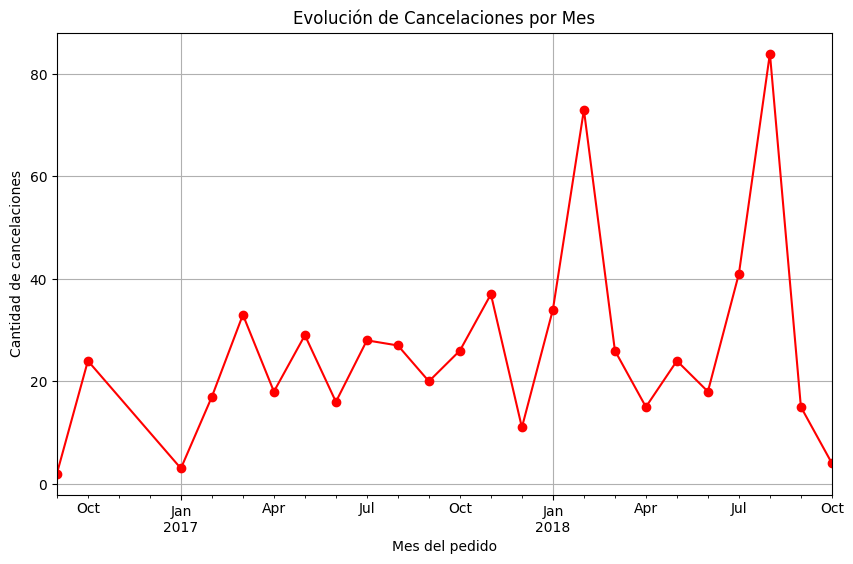

In [29]:
import matplotlib.pyplot as plt

cancelaciones_por_mes.plot(kind='line', figsize=(10, 6), marker='o', color='red')
plt.title('Evolución de Cancelaciones por Mes')
plt.xlabel('Mes del pedido')
plt.ylabel('Cantidad de cancelaciones')
plt.grid(True)
plt.show()